## Lectura Datos

In [1]:
import pandas as pd

# Cargar los datos
file_path = "DatosmodeloRaigrasfinalv10-yield.xlsx"
df = pd.read_excel(file_path)

# Mostrar las primeras filas del dataset para entender su estructura
df.head()


,Localidad,Cultivar,Altitud (m),AguadisponibleSuelo(mm),Tmax(ºC),Tmin(ºC),Precipitación(mm),Radiación(MJ/m2 dia),kg MS/ha
0,Mabegondo,Brigantia,100,102,24.8,2.7,1223.4,13.9,12300
1,Mabegondo,Brigantia,100,102,22.8,2.9,1070.5,12.9,11630
2,Mabegondo,Brigantia,100,102,24.8,2.6,1186.5,13.2,13290
3,Mabegondo,Brigantia,100,102,24.0,3.3,912.3,13.7,13740
4,Mabegondo,Brigantia,100,102,25.6,4.6,928.1,14.3,14190


## GBR (SIN AGUA ALTITUD)

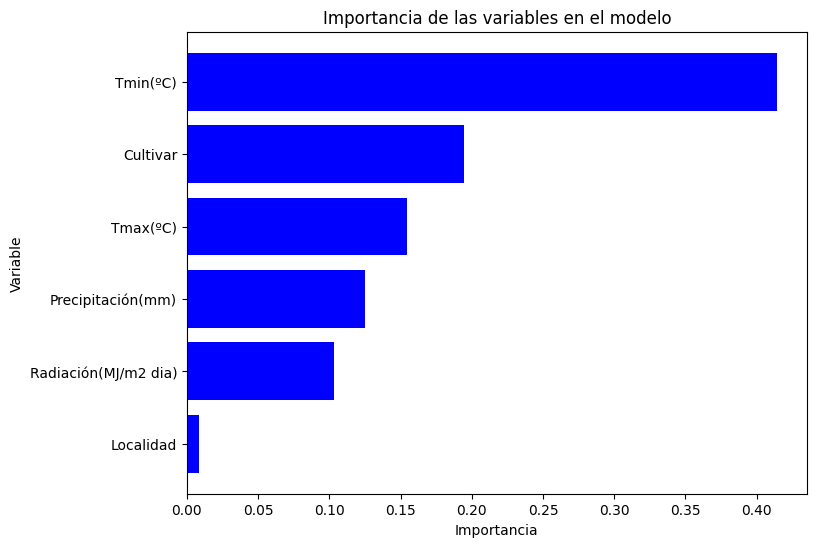

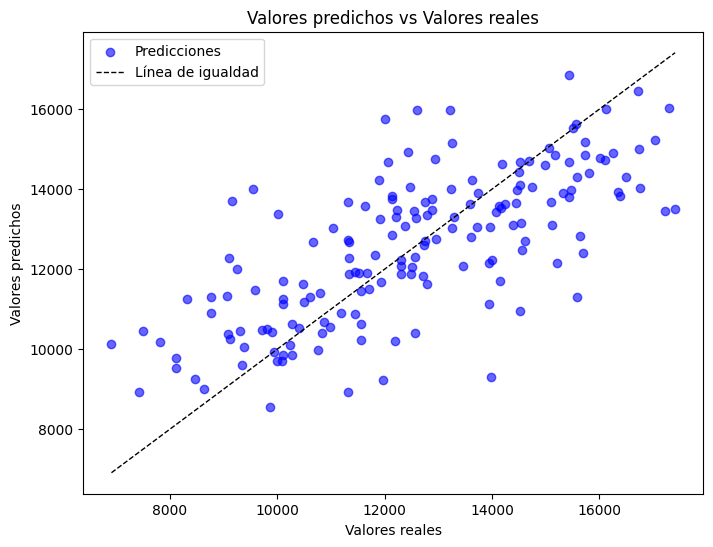

{'MAE': 1310.6393238667545, 'MSE': 2875575.478316898, 'RMSE': 1695.75218658768, 'R²': 0.5097972279294447} ['Localidad', 'Cultivar', 'Tmax(ºC)', 'Tmin(ºC)', 'Precipitación(mm)', 'Radiación(MJ/m2 dia)'] gradient_boosting_raigras.pkl


In [2]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib
import matplotlib.pyplot as plt

# Seleccionar las variables predictoras y la variable objetivo
features = ['Localidad', 'Cultivar', 'Tmax(ºC)', 'Tmin(ºC)', 'Precipitación(mm)', 'Radiación(MJ/m2 dia)']
target = 'kg MS/ha'

# Codificar las variables categóricas
label_encoders = {}
for col in ['Localidad', 'Cultivar']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Definir X e y
X = df[features]
y = df[target]

# Configurar validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Modelo Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Realizar predicciones con validación cruzada
y_pred = cross_val_predict(model, X, y, cv=kf)

# Calcular métricas de evaluación
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Ajustar el modelo final
model.fit(X, y)

# Guardar el modelo
model_path = "gradient_boosting_raigras.pkl"
joblib.dump(model, model_path)

# Mostrar métricas de evaluación
metrics = {
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse,
    "R²": r2
}

# Obtener importancia de las variables
importances = model.feature_importances_
importance_df = pd.DataFrame({"Variable": features, "Importancia": importances})
importance_df = importance_df.sort_values(by="Importancia", ascending=False)

# Graficar la importancia de las variables
plt.figure(figsize=(8, 6))
plt.barh(importance_df["Variable"], importance_df["Importancia"], color='blue')
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de las variables en el modelo")
plt.gca().invert_yaxis()  # Para que la más importante esté arriba
plt.show()

# Graficar valores predichos vs reales
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.6, label="Predicciones")
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--', lw=1, label="Línea de igualdad")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores predichos vs Valores reales")
plt.legend()
plt.show()

# Mostrar orden de las variables predictoras
feature_order = list(X.columns)

print(metrics, feature_order, model_path)
